# Exploratory Data Analysis: Univariate Analysis

## 1. Defining the Question

### a) Specifying the Question

> How can a US insurance company determine the top 10 cities where its clients have the highest annual income for persons aged 40 and below? 

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [62]:
# Loading the Data from the source i.e. csv
# Dataset url = http://bit.ly/MedicalCitiesIncomeDataset
#
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
data=pd.read_csv("http://bit.ly/MedicalCitiesIncomeDataset")

## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
data.describe()

,Number,Age,Income
count,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.798273
std,43301.414527,11.572486,24989.500948
min,1.000000,25.000000,-654.000000
25%,37500.750000,35.000000,80867.750000
50%,75000.500000,45.000000,93655.000000
75%,112500.250000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


In [4]:
# Previewing the top of our dataset
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [5]:
# Previewing the bottom of our dataset
data.tail()

,Number,City,Gender,Age,Income,Illness
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No
149999,150000,Austin,Female,37,87251.0,No


In [64]:
# Checking whether each column has an appropriate datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

In [59]:
# Checking for Outliers
upper = data.Income.mean() + 3*data.Income.std()

lower = data.Income.mean() - 3*data.Income.std()

print(upper)

print(lower)

new_df= data[(data.Income<upper) & (data.Income>lower)]
print(len(data))
print(len(new_df))

166221.30111839873
16284.295428267957
150000
149854


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


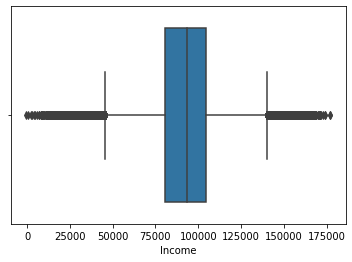

In [8]:
# Checking for Anomalies
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data['Income'])

In [63]:
# Identifying the Missing Data

print (data['Income'].isnull().sum())

0


In [10]:
# Dealing with the Missing Data
data.ffill(axis = 0)

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


In [ ]:
# More data cleaning procedures
#

## 6. Exploratory Analysis

In [11]:
# Ploting the univariate summaries and recording our observations
#mean
data['Income'].mean()

91252.79827333333

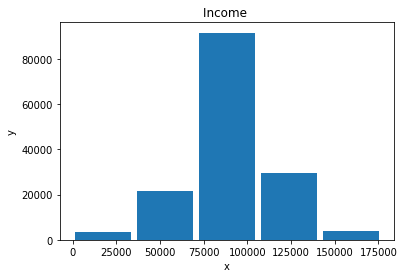

In [23]:
plt.hist(data['Income'],bins=5,histtype='bar',rwidth=0.9)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Income ")
plt.show()

In [12]:
#median
data['Income'].median()

93655.0

In [14]:
#mode
data['Income'].mode()

0    98410.0
dtype: float64

In [15]:
#std deviation
data['Income'].std()

24989.500948355126

In [17]:
#variance
data['Income'].var()

624475157.6478417

In [18]:
#quartiles
data.quantile([0.25,0.5,0.75])

,Number,Age,Income
0.25,37500.75,35.0,80867.75
0.50,75000.50,45.0,93655.00
0.75,112500.25,55.0,104519.00


In [16]:
#range
max=data['Income'].max()
min=data['Income'].min()
range=max-min
print(range)

177811.0


In [20]:
#skewness
data['Age'].skew()
#positively skewed

0.005365159658673366

In [21]:
#kurtosis
data['Age'].kurt()
#platykurtic distr

-1.1960202114369298

In [25]:
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


## 7. Implementing the Solution

In [53]:
# Implementing the Solution
# How can a US insurance company determine the top 10 cities where its clients have the highest 
#annual income for persons aged 40 and below?
#data[data['Age']<40].sort_values(by=['Income'],unique(['City']))
#ascending=False).head(10)
#a=data['City'].unique()
a=data[data['Age']<40]
b=a.drop_duplicates(subset='City')
#b=data.groupby('City').max()
#b[b['Age']<40]
print(sorted(b['City'])).head(5)
#print(data['City'].unique())
#print(sorted(df_new['A']))

AttributeError: ignored

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

# b). Do we need other data to answer our question?

### c). Did we have the right question?